<a href="https://colab.research.google.com/github/clap-b/thedarezone-landing-69064/blob/main/Assignements/Part%201/Assignment_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSML investigation:
### You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

### Your mission, should you choose to accept it, is to find that agent before any classified information gets stolen. Good luck!


## Assignment part one

Airport security confiscated a laptop of a spy, which was later given to you. The laptop contains some documents that might be useful in the investigation process. You retrieve those documents and want to analyse them. Our intelligence shows that the person that we are looking for has visited the USA between Sept 2019 to Oct 2020. He is currently working undercover.


### Getting to know our data

We have retrieved from the laptop the following file:
- A list of suspects
- The flight records of these potential suspects



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
userRecords = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/refs/heads/master/Assignements/Part%201/data/userRecords.csv")
travelRecords = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/refs/heads/master/Assignements/Part%201/data/flightRecords.csv")

#### Shape of the data

Let's first check how many rows and columns (features) are in the user records

In [7]:
#Your code here
print(userRecords.shape)

(957, 8)


**Q1. How many rows are there in the user records dataset?**


#### Check out the first few rows
Print the first few rows of the user records dataset and check them. Note that to protect innocent people, the name of the suspects have been censored, those will be revealed once number of potential suspects decreases.


In [8]:
#Your code here
print(userRecords.head(10))

   UserID first_name  last_name  birthday country marital_status  \
0  317991      Lu***    Al*****  29.07.03      AR              1   
1  241892     Ma****  Ro*******  10.11.99      AR              1   
2  303376     Fr****     Ac****  25.07.84      AR              1   
3  761992     Fr****      Go***  20.03.70      AR              1   
4  373318      Jo***      Ro***  05.10.71      AR              1   
5  938770    Ri*****      Ro***  16.12.59      AR              1   
6  676003   Cr******  Ro*******  24.07.67      AR              0   
7  169743    Li*****  Fe*******  19.09.68      AR              0   
8  255073     Al****     Ga****  06.09.98      AR              0   
9  468560   Ga******  Fe*******  18.04.60      AR              1   

   number_of_kids               employment  
0             2.0             Web Designer  
1             0.0                   Banker  
2             0.0            Kitchen staff  
3             0.0       Teaching Assistant  
4             0.0  Adminis

#### Column/feature names
print the list of columns in the user records dataset.

In [9]:
#Your code here
print(userRecords.columns)

Index(['UserID', 'first_name', 'last_name', 'birthday', 'country',
       'marital_status', 'number_of_kids', 'employment'],
      dtype='object')


#### Duplicates
Check if there are any duplicate entries in the user records dataset.

__Remark__: If there are two rows in the dataset that have the same value for __all of the columns__, we consider this as a duplicate.

In [10]:
#Your code here
print(userRecords.duplicated().any())

True


Show all the duplicated rows in the user records dataset.

__Hint:__ use the method `duplicated(keep=False)` to get all occurrences of the duplicated rows.

In [11]:
#Your code here
duplicates = userRecords[userRecords.duplicated(keep=False)]
print(duplicates)

     UserID first_name last_name  birthday country marital_status  \
18   100684    Ma*****    Me****  17.06.76      AR            NaN   
19   100684    Ma*****    Me****  17.06.76      AR            NaN   
47   910382      Ni***    El****  21.03.75      AZ            NaN   
165  910382      Ni***    El****  21.03.75      AZ            NaN   
276  610518    An*****  An******  15.02.53      DK              1   
290  610518    An*****  An******  15.02.53      DK              1   

     number_of_kids               employment  
18              0.0  Administrative employee  
19              0.0  Administrative employee  
47              0.0  Administrative employee  
165             0.0  Administrative employee  
276             NaN                  Manager  
290             NaN                  Manager  


**Q2. Are there any duplicate entries in the user records dataset?**

*Note: Duplicate entries refer to two or more rows where all the values across every column are identical.*

**Q3. How many duplicate entries are in the user records dataset?**

(Remark: for instance: there are 2 duplicate "entries" in the following list: '1 ,2, 1, 3, 3, 4, 5'. It's 1 and 3).

Drop the duplicate entries in the user records dataset.

In [12]:
#Your code here
print(userRecords.duplicated().sum())

3


### Spies often use false identities with fabricated data.

#### This suggests that if certain data points occur with statistically improbable frequency, they might be fabricated.

In this part we are going to verify if there are birthdates that have been reused an unusual amount of times.

Let's first ensure that the birthday column in the user records dataset has the correct format (datetime):


In [13]:
#Check the data type of each feature
#Your code here
print(userRecords.dtypes)

UserID              int64
first_name         object
last_name          object
birthday           object
country            object
marital_status     object
number_of_kids    float64
employment         object
dtype: object


Convert the column `birthday` to datetime if necessary

In [14]:
#Your code here
userRecords['birthday'] = pd.to_datetime(userRecords['birthday'], errors='coerce')
print(userRecords.dtypes)

UserID                     int64
first_name                object
last_name                 object
birthday          datetime64[ns]
country                   object
marital_status            object
number_of_kids           float64
employment                object
dtype: object


/tmp/ipython-input-353068658.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  userRecords['birthday'] = pd.to_datetime(userRecords['birthday'], errors='coerce')


Find the list of birthdays that are duplicated/reused in the dataset

In [15]:
#Your code here
duplicates = userRecords[userRecords['birthday'].duplicated(keep=False)]
print(duplicates['birthday'])

6     2067-07-24
13    2004-11-30
18    1976-06-17
19    1976-06-17
34    2057-06-25
46    1991-02-12
47    1975-03-21
74    2067-07-24
112   2057-12-24
150   1983-03-15
153   2068-09-22
160   1975-01-28
165   1975-03-21
183   2068-09-22
186   2055-08-01
191   2062-07-07
209   2055-08-01
241   2057-12-18
276   2053-02-15
288   2057-12-24
290   2053-02-15
305   2070-03-18
312   2068-09-10
329   2004-11-30
355   2057-06-25
370   1978-11-21
393   1983-03-15
396   1991-02-12
399   2060-03-26
481   1983-08-26
501   2070-06-04
511   2060-06-23
516   1978-11-21
538   1999-09-08
557   1999-12-09
570   2060-03-26
592   1999-09-08
623   2054-03-26
627   1992-01-06
630   1992-01-06
647   1992-01-06
666   2070-03-18
668   1992-01-06
715   2060-06-23
722   2062-07-07
723   1983-08-26
772   2070-06-04
790   2057-12-18
807   1975-01-28
810   2068-09-10
838   1999-12-09
950   2054-03-26
Name: birthday, dtype: datetime64[ns]


Let's count how many people have their birthday on the same day among the duplicated birthdays.

In [16]:
#Your code here
birthday_counts = userRecords['birthday'].value_counts()
reused_birthdays = birthday_counts[birthday_counts>1]
print(reused_birthdays)

birthday
1992-01-06    4
2070-06-04    2
2057-12-24    2
2054-03-26    2
1983-03-15    2
2060-06-23    2
2068-09-22    2
2057-06-25    2
1976-06-17    2
1991-02-12    2
1975-03-21    2
2060-03-26    2
1999-09-08    2
1999-12-09    2
2062-07-07    2
2068-09-10    2
2070-03-18    2
2055-08-01    2
1975-01-28    2
2053-02-15    2
2067-07-24    2
1983-08-26    2
2004-11-30    2
1978-11-21    2
2057-12-18    2
Name: count, dtype: int64


**Q4. What is the most common birthday in the dataset?**

In [17]:
most_common_birthday = userRecords['birthday'].value_counts().idxmax()
count = userRecords['birthday'].value_counts().max()
print(most_common_birthday)

1992-01-06 00:00:00


**Q5. How many users have their birthdays on that day (the most common birthday)?**

We can consider that there is no suspicious discrepancy through birthdays.


#### We have reasons to believe that the suspect works very thoroughly, so he would make sure that the fabricated data about his identity is complete in order for his operation to run smoothly.
#### Therefore, we can exclude the people with incomplete information from the list of potential suspects.

Count how many null values are there in each column of the user records dataset. You can call `isnull()` and `sum()` to get a count of how many null values are there in each column.

In [18]:
#Your code here
null_counts = userRecords.isnull().sum()
print(null_counts)

UserID              0
first_name          1
last_name           1
birthday            1
country             0
marital_status    104
number_of_kids    153
employment          1
dtype: int64


If you encounter any null values in the dataset, be sure to exclude those entries from the suspect list.

In [19]:
#Your code here
cleaned_userRecords = userRecords.dropna()
print(cleaned_userRecords)

     UserID  first_name  last_name   birthday country marital_status  \
0    317991       Lu***    Al***** 2003-07-29      AR              1   
1    241892      Ma****  Ro******* 1999-10-11      AR              1   
2    303376      Fr****     Ac**** 1984-07-25      AR              1   
3    761992      Fr****      Go*** 2070-03-20      AR              1   
4    373318       Jo***      Ro*** 2071-05-10      AR              1   
..      ...         ...        ...        ...     ...            ...   
950  458293  No********   Wi****** 2054-03-26      ZA              1   
952  218415    Bu******   Mo****** 2001-01-22      ZA              0   
953  173906     Th*****   Mo****** 2061-06-11      ZA              0   
954  178685     Mi*****  Bu******* 2053-05-29      ZA              0   
955  200865   Si*******     Na**** 2062-12-16      ZA              0   

     number_of_kids               employment  
0               2.0             Web Designer  
1               0.0                   Ban

### Linking the user records to the flight records

We will now proceed to identify the users who were in the USA from Sept 1st, 2019 to Oct 31st, 2020.

We will merge the flight records with the user records in order to ensure that users who have been unsuspected in the previous step are not considered.

In [ ]:
#check the user records dataset

In [ ]:
#check the flight records dataset


[Merging](https://pandas.pydata.org/docs/user_guide/merging.html) the two datasets:

*Hint: Use the above questions to identify on what feature to merge the datasets*

The result should contain the features flightName, Departure, Arrival,  Date, UserID, first_name, last_name, etc.

In [20]:
#Your code here
merged_data = pd.merge(travelRecords, cleaned_userRecords, left_on="userID", right_on="UserID", how="inner")
print(merged_data)


      flightName departure destination      date  userID  UserID first_name  \
0        KX65826        AR          IT  20.01.10  317991  317991      Lu***   
1        CL12336        IT          MT  16.06.10  317991  317991      Lu***   
2       YN106988        MT          SE  08.05.11  317991  317991      Lu***   
3        CB58289        SE          EE  08.11.11  317991  317991      Lu***   
4       SX625101        EE          AZ  17.11.11  317991  317991      Lu***   
...          ...       ...         ...       ...     ...     ...        ...   
19032    IY61324        PL          ZA  01.09.20  200865  200865  Si*******   
19033    JO46672        ZA          DZ  20.07.21  200865  200865  Si*******   
19034  HX1014810        DZ          CR  22.01.22  200865  200865  Si*******   
19035   DL869109        CR          GT  28.04.22  200865  200865  Si*******   
19036    XK61479        GT          KR  24.03.23  200865  200865  Si*******   

      last_name   birthday country marital_status  

Remember, our suspect operates meticulously, ensuring that there are no null values in any entries.

In [21]:
#Your code here
null_counts = merged_data.isnull().sum()
print(null_counts)

flightName        0
departure         0
destination       0
date              0
userID            0
UserID            0
first_name        0
last_name         0
birthday          0
country           0
marital_status    0
number_of_kids    0
employment        0
dtype: int64


Let's now identify the users who has **travelled to** the United States (US) between the 1st of september 2019 and the 31st of october 2020.

*Note that the travel date is not in datetime format.*

In [22]:


travelRecords["date"] = pd.to_datetime(travelRecords["date"], errors="coerce")

start_date = "01.09.19"
end_date   = "31.10.20"


us_travellers = travelRecords[(travelRecords["destination"] == "US") & (travelRecords["date"] >= start_date) & (travelRecords["date"] <= end_date)]

print(us_travellers)
print(us_travellers.to_string())


/tmp/ipython-input-2902423039.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  travelRecords["date"] = pd.to_datetime(travelRecords["date"], errors="coerce")


      flightName departure destination       date  userID
268     MG891910        AR          US 2020-07-16  468560
638    OO3731010        CA          US 2020-10-04  255830
947     OV733110        BE          US 2020-04-06  291994
1003     MY56747        SG          US 2020-02-19  919502
1525     GU84573        ES          US 2020-10-02  861915
...          ...       ...         ...        ...     ...
24743    TE38388        AR          US 2019-05-18  619738
24798   QI107642        TR          US 2019-10-14  748564
24849   DQ105473        AR          US 2019-05-18  868229
24985   BT519103        NL          US 2020-09-05  866017
25389  WV1010933        HU          US 2019-01-19  102637

[78 rows x 5 columns]
      flightName departure destination       date  userID
268     MG891910        AR          US 2020-07-16  468560
638    OO3731010        CA          US 2020-10-04  255830
947     OV733110        BE          US 2020-04-06  291994
1003     MY56747        SG          US 2020-02-19

**Q6. How many suspects travelled to the US between the 1st of September 2019 and the 31st of October 2020?**

**Q7. Which users are included in the remaining list of suspects who traveled to the US between the 1st of September 2019 and the 31st of October 2020?** Choose from the answers on Moodle.

## [Data visualisation ](https://pandas.pydata.org/docs/user_guide/visualization.html)

 Suisse Impossible Mission Force is happy with the result and would like to have some visual aid to make a profile of the potential suspects.

Let's create a pie chart to visualize the employment distribution among the suspects who traveled to US between September 1st, 2019, and October 31st, 2020.

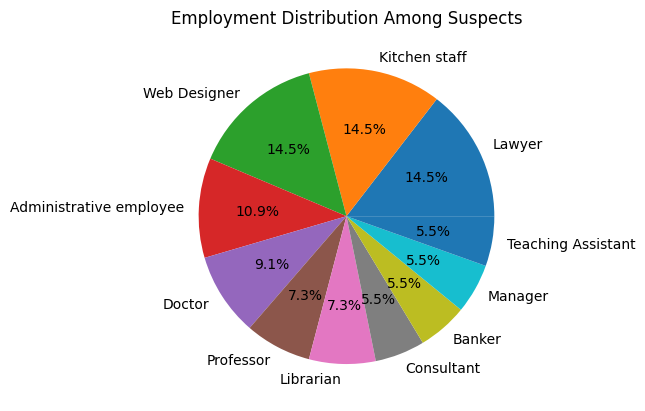

In [23]:
#Your code here
suspects_info = pd.merge(
    us_travellers,
    cleaned_userRecords,
    left_on="userID",
    right_on="UserID",
    how="inner")


employment_distribution = suspects_info['employment'].value_counts()
plt.pie(employment_distribution, labels=employment_distribution.index, autopct='%1.1f%%')
plt.title('Employment Distribution Among Suspects')
plt.show()

**Q8. Which profession is the least represented among the suspects the suspects who traveled to US between September 1st, 2019, and October 31st, 2020?**
 Choose from the answers on Moodle.


## Journey length

The Suisse Impossible Mission Force suspects that the rogue agent is an anomaly within his declared employment category, particularly in terms of the number of days he spent at destinations compared to his peers.

To identify such deviations, we can employ boxplots for each employment category, allowing us to visually identify outliers in the data.

First, let's construct two tables: one for the dates of arrival and another for the dates of departure. Utilize the existing dataset to extract these dates based on the 'destination' and 'departure' columns. Ensure that both the arrival and departure dates are within the period the suspect is believed to have been in the US, which is from September 2019 to October 2020.

In [77]:
# For this step we will need the information not only about the fights to the US,
# but also about the flights taken from the US
# Your code here

def drop_employment_cols(df):
    cols = [c for c in df.columns if c.startswith("employment")]
    return df.drop(columns=cols, errors="ignore")

arrivals_full  = drop_employment_cols(arrivals_full)
departures_full = drop_employment_cols(departures_full)

arrivals_full = (
    arrivals_full
      .merge(emp_df, left_on="userID", right_on="userid", how="left")
      .drop(columns=["userid"])

departures_full = (
    departures_full
      .merge(emp_df, left_on="userID", right_on="userid", how="left")
      .drop(columns=["userid"]))



print("Arrivals with employment (full info):\n", arrivals_full.head(), "\n")
print("Departures with employment (full info):\n", departures_full.head())

Arrivals with employment (full info):
    userID flightName departure destination arrival_date    employment
0  123699    PK41837        PL          US   2020-07-19        Lawyer
1  139646    HA26526        HU          US   2019-10-11        Doctor
2  206269    II54584        JP          US   2019-11-06        Banker
3  220420   TF469810        IT          US   2020-03-17  Web Designer
4  226545    YM88531        BD          US   2020-03-09           NaN 

Departures with employment (full info):
    userID flightName departure destination departure_date     employment
0  102637   CS831031        US          DE     2019-09-04            NaN
1  139646   ZV283105        US          JP     2020-07-29         Doctor
2  158043   JP106659        US          MT     2020-09-21            NaN
3  178685    MN23734        US          FR     2019-10-18      Professor
4  205381    BT95799        US          SG     2019-11-07  Kitchen staff


We can keep on both of these tables the user ID, employment, and departure date / arrival date.

In [78]:
#Your code here
# Arrivals table
# Arrivals table


arrivals = arrivals_full[["userID", "employment", "arrival_date"]].copy()
departures = departures_full[["userID", "employment", "departure_date"]].copy()

arrivals_clean = arrivals.dropna(subset=["arrival_date", "employment"])
departures_clean = departures.dropna(subset=["departure_date", "employment"])

print(arrivals_clean.head(), "\n")
print(departures_clean.head())


   userID    employment arrival_date
0  123699        Lawyer   2020-07-19
1  139646        Doctor   2019-10-11
2  206269        Banker   2019-11-06
3  220420  Web Designer   2020-03-17
7  255830     Professor   2020-10-04 

   userID     employment departure_date
1  139646         Doctor     2020-07-29
3  178685      Professor     2019-10-18
4  205381  Kitchen staff     2019-11-07
8  255830      Professor     2020-07-10
9  265615   Web Designer     2019-11-17


We can now join the two tables on user ID

In [79]:
#Your code here



stays = pd.merge(
    arrivals_clean,
    departures_clean,
    on=["userID", "employment"],
    how="inner")

print(stays.head())

   userID     employment arrival_date departure_date
0  139646         Doctor   2019-10-11     2020-07-29
1  255830      Professor   2020-10-04     2020-07-10
2  287607  Kitchen staff   2020-02-16     2020-06-30
3  410319         Lawyer   2020-04-23     2020-10-12
4  412064         Banker   2019-12-06     2019-10-21


We can now create a new feature called journey_length representing the difference between departure date and arrival date.

*Hint: Ensure that the journey_length is in the right format*

In [92]:
#Your code here
stays["journey_length"] = (stays["departure_date"] - stays["arrival_date"]).dt.days


print(stays.head())


   userID     employment arrival_date departure_date  journey_length
0  139646         Doctor   2019-10-11     2020-07-29             292
2  287607  Kitchen staff   2020-02-16     2020-06-30             135
3  410319         Lawyer   2020-04-23     2020-10-12             172
8  556033   Web Designer   2019-10-13     2019-10-22               9
9  581969      Librarian   2019-10-15     2020-05-07             205


*Sidenote: if you get negative journey length, what would be your explanation to that?*

We can now create the boxplots where the x-axis represents each profession and the y-axis corresponds to the journey length.

Text(0, 0.5, 'Journey Length (days)')

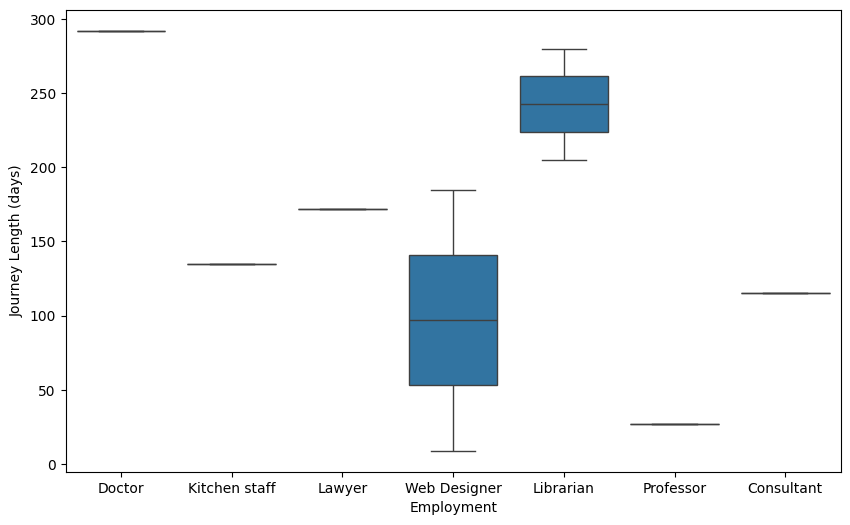

In [93]:
#Your code here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="employment", y="journey_length", data=stays)
plt.xlabel("Employment")
plt.ylabel("Journey Length (days)")

**Q9. Which profession has the most staggering outlier?**
(Meaning that the outlier value is the farthest away from the corresponding boxplot.)

### SIMF is satisfied with your work but believes the current data is inconclusive.

Your investigation will continue when more intelligence comes in...

**Don't forget to complete the moodle quiz ([Assignment Q1](https://moodle.unil.ch/mod/quiz/view.php?id=1744562)) and submit your code ([Code Q1](https://moodle.unil.ch/mod/assign/view.php?id=1744563)) on Moodle before Monday 30.09.2024.**